### A Note on Tuning Hyperparameters

The following are the hypterparameters I can tune with.
- Number of samples per class.
- Learning rate
- FFT size (this may force us to change the network architecture, i.e., number of layers and number of nodes per layer.)
- FFT overlap
- Epoch size

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### Functions

In [2]:
def getData(cfileName):
    """
    Given a name of a *.cfile, this function extracts the interleaved
    Inphase-Quadrature data samples and convert it into a numpy array of complex
    data elements. *.cfile format has interleaved I and Q samples where each sample
    is a float32 type. GNURadio Companion (GRC) scripts output data into a file
    though a file sink block in this format.
    Read more in SDR data types: https://github.com/miek/inspectrum
    """
    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")
    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    return data

### Loading an EM Trace and Plotting

#### Settings:

In [3]:
# number of samples per class
num_samp_per_class = 7000

# FFT size for the STFT operation (which is same as the feature vector size)
fft_size = feature_vector_size = 1024

# number of overlapping samples for the STFT operation
fft_overlap = 256

In [4]:
labels = ["calender-app", "camera-photo", "camera-video", "email-app", "gallary-app"
          , "home-screen", "idle-device", "phone-app", "sms-app", "web-browser"]

#### Preparing the Data of Class 0

In [5]:
class_label = 0

In [6]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/apple-iphone-4s/calandar-app.cfile")

In [7]:
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)

/home/asanka/miniconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


1024
77997
(1024, 77997)


In [8]:
del data

In [9]:
Zxx = Zxx.transpose()

In [10]:
X = Zxx[:num_samp_per_class]
y = np.full(num_samp_per_class, class_label)
del Zxx

In [11]:
print(X.shape)
print(y.shape)

(7000, 1024)
(7000,)


#### Preparing the Data of Class 1

In [12]:
class_label = 1

In [13]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/apple-iphone-4s/camera-photo.cfile")

In [14]:
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)

1024
90170
(1024, 90170)


In [15]:
del data

In [16]:
Zxx = Zxx.transpose()

In [17]:
X = np.concatenate((X, Zxx[:num_samp_per_class]), axis=0) 
y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
del Zxx

In [18]:
print(X.shape)
print(y.shape)

(14000, 1024)
(14000,)


#### Preparing the Data of Class 2

In [19]:
class_label = 2

In [20]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/apple-iphone-4s/camera-video.cfile")

In [21]:
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)

1024
112734
(1024, 112734)


In [22]:
del data

In [23]:
Zxx = Zxx.transpose()

In [24]:
X = np.concatenate((X, Zxx[:num_samp_per_class]), axis=0) 
y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
del Zxx

In [25]:
print(X.shape)
print(y.shape)

(21000, 1024)
(21000,)


#### Preparing the Data of Class 3

In [26]:
class_label = 3

In [27]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/apple-iphone-4s/email-app.cfile")

In [28]:
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)

1024
84300
(1024, 84300)


In [29]:
del data

In [30]:
Zxx = Zxx.transpose()

In [31]:
X = np.concatenate((X, Zxx[:num_samp_per_class]), axis=0) 
y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
del Zxx

In [32]:
print(X.shape)
print(y.shape)

(28000, 1024)
(28000,)


#### Preparing the Data of Class 4

In [33]:
class_label = 4

In [34]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/apple-iphone-4s/gallary-app.cfile")

In [35]:
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)

1024
95547
(1024, 95547)


In [36]:
del data

In [37]:
Zxx = Zxx.transpose()

In [38]:
X = np.concatenate((X, Zxx[:num_samp_per_class]), axis=0) 
y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
del Zxx

In [39]:
print(X.shape)
print(y.shape)

(35000, 1024)
(35000,)


#### Preparing the Data of Class 5

In [40]:
class_label = 5

In [41]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/apple-iphone-4s/home-screen.cfile")

In [42]:
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)

1024
90285
(1024, 90285)


In [43]:
del data

In [44]:
Zxx = Zxx.transpose()

In [45]:
X = np.concatenate((X, Zxx[:num_samp_per_class]), axis=0) 
y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
del Zxx

In [46]:
print(X.shape)
print(y.shape)

(42000, 1024)
(42000,)


#### Preparing the Data of Class 6

In [47]:
class_label = 6

In [48]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/apple-iphone-4s/idle.cfile")

In [49]:
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)

1024
98563
(1024, 98563)


In [50]:
del data

In [51]:
Zxx = Zxx.transpose()

In [52]:
X = np.concatenate((X, Zxx[:num_samp_per_class]), axis=0) 
y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
del Zxx

In [53]:
print(X.shape)
print(y.shape)

(49000, 1024)
(49000,)


#### Preparing the Data of Class 7

In [54]:
class_label = 7

In [55]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/apple-iphone-4s/phone-app.cfile")

In [56]:
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)

1024
79874
(1024, 79874)


In [57]:
del data

In [58]:
Zxx = Zxx.transpose()

In [59]:
X = np.concatenate((X, Zxx[:num_samp_per_class]), axis=0) 
y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
del Zxx

In [60]:
print(X.shape)
print(y.shape)

(56000, 1024)
(56000,)


#### Preparing the Data of Class 8

In [61]:
class_label = 8

In [62]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/apple-iphone-4s/sms-app.cfile")

In [63]:
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)

1024
98480
(1024, 98480)


In [64]:
del data

In [65]:
Zxx = Zxx.transpose()

In [66]:
X = np.concatenate((X, Zxx[:num_samp_per_class]), axis=0) 
y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
del Zxx

In [67]:
print(X.shape)
print(y.shape)

(63000, 1024)
(63000,)


#### Preparing the Data of Class 9

In [68]:
class_label = 9

In [69]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/apple-iphone-4s/web-browser-app.cfile")

In [70]:
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)

1024
77485
(1024, 77485)


In [71]:
del data

In [72]:
Zxx = Zxx.transpose()

In [73]:
X = np.concatenate((X, Zxx[:num_samp_per_class]), axis=0) 
y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
del Zxx

In [74]:
print(X.shape)
print(y.shape)

(70000, 1024)
(70000,)


### Building the Model

In [75]:
X = abs(X)

# scaling the features (only real part of the data can be used)
scaler = MinMaxScaler()
scaler.fit(X)
print(scaler.data_max_)
X = scaler.transform(X)

[0.0230441  0.01509799 0.00488695 ... 0.00272524 0.00510726 0.01498533]


In [76]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [77]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
#model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
#model.add(keras.layers.Dense(100, activation="relu"))
#model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               512500    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               100200    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2010      
Total params: 614,710
Trainable params: 614,710
Non-trainable params: 0
_________________________________________________________________


In [78]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
#model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [79]:
history = model.fit(X_train, y_train, epochs=60, validation_split=0.1)

Epoch 1/60
1575/1575 [==============================] - 7s 4ms/step - loss: 2.2916 - accuracy: 0.1384 - val_loss: 2.2667 - val_accuracy: 0.1964
Epoch 2/60
1575/1575 [==============================] - 6s 4ms/step - loss: 2.2352 - accuracy: 0.2285 - val_loss: 2.2072 - val_accuracy: 0.2421
Epoch 3/60
1575/1575 [==============================] - 6s 4ms/step - loss: 2.1605 - accuracy: 0.2719 - val_loss: 2.1219 - val_accuracy: 0.2766
Epoch 4/60
1575/1575 [==============================] - 5s 3ms/step - loss: 2.0625 - accuracy: 0.3088 - val_loss: 2.0190 - val_accuracy: 0.3223
Epoch 5/60
1575/1575 [==============================] - 6s 4ms/step - loss: 1.9618 - accuracy: 0.3474 - val_loss: 1.9273 - val_accuracy: 0.3564
Epoch 6/60
1575/1575 [==============================] - 5s 3ms/step - loss: 1.8756 - accuracy: 0.3860 - val_loss: 1.8474 - val_accuracy: 0.3945
Epoch 7/60
1575/1575 [==============================] - 6s 4ms/step - loss: 1.7983 - accuracy: 0.4200 - val_loss: 1.7750 - val_accuracy:

1575/1575 [==============================] - 7s 4ms/step - loss: 0.7289 - accuracy: 0.7447 - val_loss: 0.7831 - val_accuracy: 0.7225
Epoch 58/60
1575/1575 [==============================] - 6s 4ms/step - loss: 0.7256 - accuracy: 0.7452 - val_loss: 0.7879 - val_accuracy: 0.7209
Epoch 59/60
1575/1575 [==============================] - 6s 4ms/step - loss: 0.7229 - accuracy: 0.7472 - val_loss: 0.7813 - val_accuracy: 0.7248
Epoch 60/60
1575/1575 [==============================] - 6s 4ms/step - loss: 0.7198 - accuracy: 0.7475 - val_loss: 0.7768 - val_accuracy: 0.7232


### Plotting

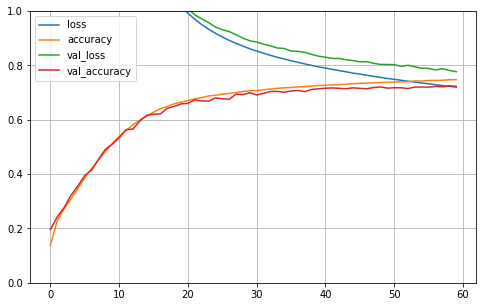

In [80]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

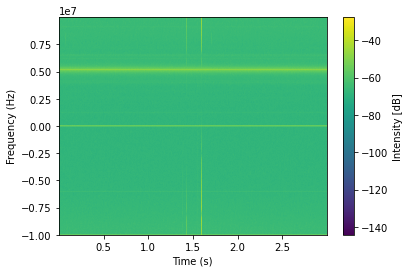

In [5]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/apple-iphone-4s/calandar-app.cfile")

fig = plt.figure()
pxx, freq, t, cax = plt.specgram(data, NFFT=1024, Fs=20e6, mode='magnitude')
fig.colorbar(cax).set_label('Intensity [dB]')
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()